In [32]:
# Dictionary of authorized plates with their current status
authorized_plates = {
    'ABC123': 'in',
    'XYZ789': 'out',
    'DEF456': 'in',
    'GHI012': 'in',
    'JKL345': 'out',
    'AVE- 068': 'out'
}

<IPython.core.display.Javascript object>

Saved to photo.jpg


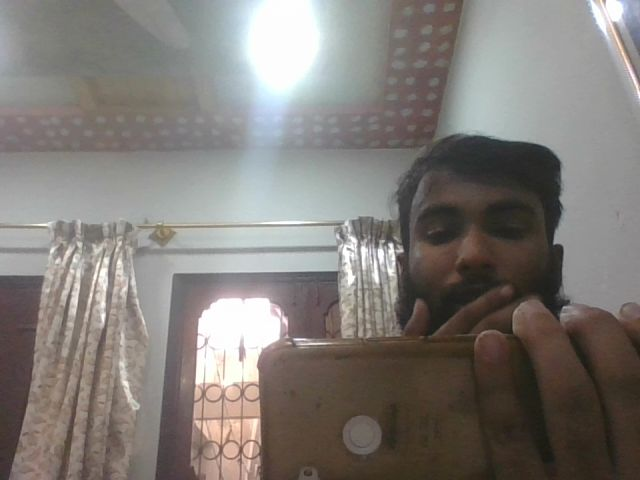

In [33]:
import base64
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Encode your audio file in base64
with open("welcome.mp3", "rb") as audio_file:
    base64_audio_data = base64.b64encode(audio_file.read()).decode('utf-8')

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript(f'''
        async function takePhoto(quality) {{
            const div = document.createElement('div');
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({{video: true}});

            // Create an audio element and play the welcome message
            const audio = new Audio('data:audio/mp3;base64,{base64_audio_data}');
            audio.play();

            // Display a message
            const message = document.createElement('p');
            message.textContent = 'Welcome to XYZ Society. Please wait 5 seconds while we prepare to capture your photo.';
            div.appendChild(message);

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for 10 seconds
            await new Promise(resolve => setTimeout(resolve, 10000));

            // Capture the photo
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            // Stop video stream
            stream.getVideoTracks()[0].stop();

            // Remove the elements
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }}
    ''')

    display(js)
    data = eval_js('takePhoto({})'.format(quality))

    # Decode the image data and save it to file
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

from IPython.display import Image

try:
    filename = take_photo()  # Save the photo as 'photo.jpg'
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))


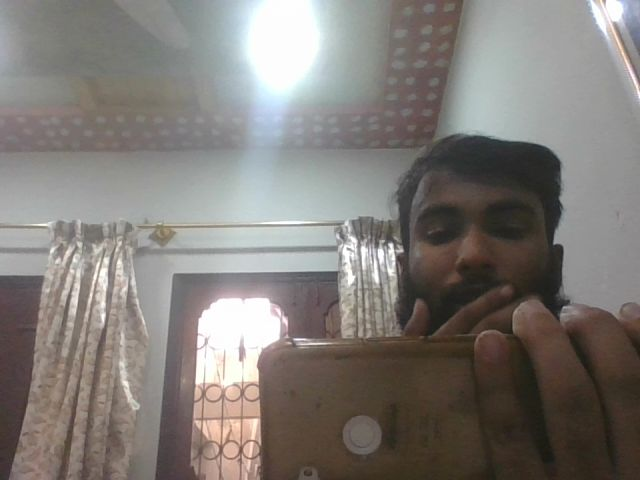

In [34]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img= cv2.imread("photo.jpg")
cv2_imshow(img)

In [35]:
pip install easyocr

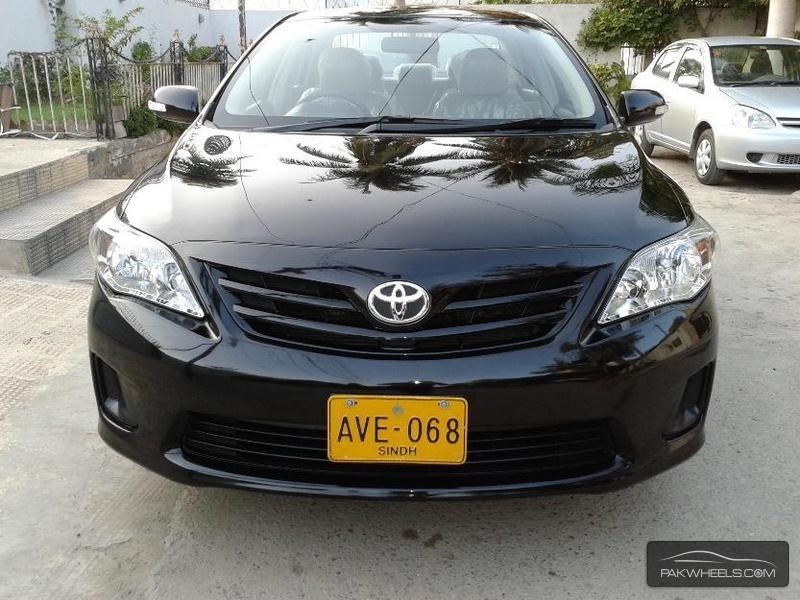


Detected Number Plate Text: AVE- 068


In [36]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

# Load the image
img_path = 'car plate.jpg'
image = cv2.imread(img_path)

# Display the image
cv2_imshow(image)

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Read the text from the image
results = reader.readtext(img_path)

# Filter the results to find the number plate text
# Adjust the conditions below based on the specific characteristics of your number plates and province name
number_plate_text = ""
for (bbox, text, prob) in results:
    # Example condition: The number plate text is expected to be shorter than a certain length
    if len(text) <= 8 and prob > 0.5:  # You may adjust the length and probability thresholds
        number_plate_text = text
        break

# Display the detected number plate text
if number_plate_text:
    print(f"\nDetected Number Plate Text: {number_plate_text}")
else:
    print("Number plate text not found.")


In [39]:
from datetime import datetime
# Function to handle vehicle entry
def handle_entry(license_plate):
    current_time = datetime.now()
    if license_plate in authorized_plates:
        if authorized_plates[license_plate] == 'in':
            print(f"Vehicle with plate {license_plate} is already inside.")
            return "Entry Denied"
        else:
            authorized_plates[license_plate] = 'in'
            print(f"Vehicle with plate {license_plate} entered at {current_time}.")
            return "Entry Allowed"
    else:
        print(f"Vehicle with plate {license_plate} is not authorized.")
        return "Entry Denied"
# Function to handle vehicle exit
def handle_exit(license_plate):
    current_time = datetime.now()
    if license_plate in authorized_plates:
        if authorized_plates[license_plate] == 'in':
            authorized_plates[license_plate] = 'out'
            print(f"Vehicle with plate {license_plate} exited at {current_time}.")
            return "Exit Recorded"
        else:
            print(f"Vehicle with plate {license_plate} is not currently inside.")
            return "No Entry Recorded"
    else:
        print(f"Vehicle with plate {license_plate} is not authorized.")
        return "Exit Denied"

if number_plate_text in authorized_plates:
        print("The number plate is authorized.")
        if authorized_plates[number_plate_text] == 'in':
            n= input("Enter your entry or exit: ")
            if n=="exit":
               print(handle_exit(number_plate_text))
            else :
               print("Entry not allowed ")
        else:
            n= input("Enter your entry or exit: ")
            if n=="entry":
               print(handle_entry(number_plate_text))
            else :
               print("Exit not allowed ")
else:
        print("The number plate is not authorized.")

The number plate is authorized.
Enter your entry or exit: exit
Vehicle with plate AVE- 068 exited at 2024-07-30 10:54:24.182305.
Exit Recorded
